# Forster Data Visualization

interactive(children=(Dropdown(description='Absorption spectrum:', options=('abs.lx', 'emi.lx'), value='abs.lx…

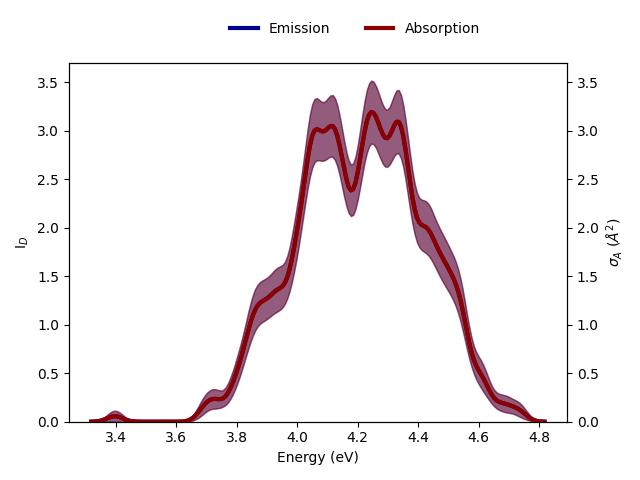

In [47]:
# Incluir um arquivo de espectro de abs e outro de emi nessa pasta do repositorio. (Feito)

# Ler os dados e plotar ambos os espectros juntos com os erros
#!/usr/bin/env python
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
%matplotlib widget
#style.use('dark_background')
#plt.rcParams['font.family'] = 'DeJavu Serif'
#plt.rcParams['font.serif'] = ['Times New Roman']
#params = {'legend.fontsize': 20,
#            'figure.figsize': (16, 12.5),
#            'figure.titlesize': 11,
#            'axes.titlesize': 40,
#            'font.family': 'Times New Roman',
#         'axes.labelsize': 35,
#         'xtick.labelsize':35,
#         'ytick.labelsize':35}
#plt.rcParams.update(params)
import ipywidgets as widgets
from IPython.display import display
import os
%matplotlib widget

files = [i for i in os.listdir('.') if '.lx' in i]

def overlap(abs_file, emi_file):
    abs = np.loadtxt(abs_file)
    emi = np.loadtxt(emi_file)
    abs_energy = abs[:,0]
    emi_energy = emi[:,0]
    abs_cross = abs[:,1]
    emi_diff = emi[:,1]
    abs_error = abs[:,2]
    emi_error = emi[:,2]

    ax.cla()
    ax2.cla()
    ax.set_xlabel("Energy (eV)")
    ax.set_ylabel("I$_D$")
    ax2.set_ylabel("$\sigma_A$ ($\AA^2$)")#,labelpad=75, rotation=270)
    #ax.ticklabel_format(axis='x', style="sci", scilimits=(0,0))
    #ax.tick_params(axis='x', labelsize=25)
    #ax.ticklabel_format(axis='y', style="sci", scilimits=(0,0))
    #ax.tick_params(axis='y', labelsize=25)
    #ax2.ticklabel_format(axis='y', style="sci", scilimits=(0,0))
    #ax2.tick_params(axis='y', labelsize=25)
    ax2.plot(abs_energy,abs_cross,color='darkred',  lw=3, label='Absorption')
    ax.plot(emi_energy, emi_diff, color='darkblue', lw=3, label='Emission')
    ax2.fill_between(abs_energy,abs_cross-abs_error,abs_cross+abs_error, color="darkred",alpha=0.4)
    ax.fill_between(emi_energy,emi_diff-emi_error,emi_diff+emi_error, color="darkblue",alpha=0.4)
    ax.legend(bbox_to_anchor =(0.55, 1.15), frameon=False)
    ax2.legend(bbox_to_anchor =(0.85, 1.15), frameon=False)
    ax.set_ylim([0,1.05*max(emi_diff+emi_error)])
    ax2.set_ylim([0,1.05*max(abs_cross+abs_error)])
    #ax.relim()       # make sure all the data fits
    #ax.autoscale()   # auto-scale
    #ax2.relim()      # make sure all the data fits
    #ax2.autoscale()  # auto-scale
    plt.tight_layout()
    

fig, ax = plt.subplots()
ax2 = ax.twinx()
    

widgets.interact(overlap, abs_file=widgets.Dropdown(options=files, values=files[0],description='Absorption spectrum:',disabled=False),
emi_file=widgets.Dropdown(options=files, values=files[0],description='Emission spectrum:',disabled=False));

# Calcular tempo de vida e raio de Forster importando funcoes do Leox (pergunta pro Tiago)